## Final Project Submission

Please fill out:
* Student name: DENNIS KOBIA
* Student pace: part time
* Scheduled project review date/time:
* Instructor name: STELLA WAITHERA
* Blog post URL:


In [219]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
#we load the datasets by copying the the file paths
bom_movie = pd.read_csv('/content/bom.movie_gross.csv.gz')
title_basics = pd.read_csv('/content/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')


WE NOW CHECK THE BOM.MOVIE_GROSS FILE TO CHECK CONTENTS OF THE DATA TO UNDERSTAND IT MORE


In [221]:
bom_movie = pd.read_csv('/content/bom.movie_gross.csv.gz')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [222]:
# we now check the contents of the data we have using info inbuilt function
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [223]:
bom_movie.shape

(3387, 5)

In [224]:
#we check the missing values
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [225]:
#we check the distribution of data
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


WE NOW START THE PROCESS OF DATA CLEANING TO DEAL WITH THE MISSING VALUES AND DUPLICATES

In [226]:
# WE REALISE STUDIO AND DOMESTIC_GROSS COLUMNS HAVE FEW MISSING VALUES, WHICH WE SHALL DROP
bom_movie.dropna(subset=['studio'],inplace=True)

In [227]:
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [228]:
# To check if the studio missing values have been dropped
bom_movie.studio.isna().sum()

0

In [229]:
#we drop the missing values for domestic gross
bom_movie.dropna(subset=['domestic_gross'],inplace=True)
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [230]:
# To check if the studio missing values have been dropped
bom_movie.domestic_gross.isna().sum()

0

In [231]:
# The foreign_gross has 1350 missing values and therefore cannot be drop since dropping will distort the data
#we fill the Nan values with zero
bom_movie['foreign_gross'].fillna(0,inplace=True)
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [232]:
#we ascertain there no more missing values in our data
#we run the following
bom_movie.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [233]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [234]:
bom_movie.shape

(3356, 5)

In [235]:
#checking for duplicates in the file
bom_movie.duplicated().sum()

0

WE NOW CHECK THE IMDB.TITLE_BASICS FILE TO CHECK CONTENTS OF THE DATA TO UNDERSTAND IT MORE

In [236]:
title_basics = pd.read_csv('/content/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [237]:
# we now check the contents of the data we have using info inbuilt function
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [238]:
title_basics.shape

(146144, 6)

In [239]:
#we check the missing values
title_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [240]:
#we check the distribution of data
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


WE NOW START THE PROCESS OF DATA CLEANING TO DEAL WITH THE MISSING VALUES AND DUPLICATES

In [241]:
# WE REALISE ORIGINAL_TITLE AND GENRES COLUMNS HAVE FEW MISSING VALUES, WHICH WE SHALL DROP
title_basics.dropna(subset=['original_title'],inplace=True)
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [242]:
title_basics.dropna(subset=['genres'],inplace=True)
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [243]:
# To check if the  missing values have been dropped
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

In [244]:
#runtime_minutes is a float so we can compute the measures of central tendency
# such as mean & median which we will use to fill the missing values.
runtime_minutes_mean = title_basics['runtime_minutes'].mean()
runtime_minutes_mean

86.26155641884668

In [245]:
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(),inplace = True)
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.261556,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,86.261556,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.261556,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.261556,Comedy


In [246]:
# We check if the status of missing values
title_basics.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [247]:
# WE NOW CHECK FOR THE DUPLICATES IN THE DATA
title_basics.duplicated().sum()

0

In [248]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


WE NOW CHECK THE IMDB.TITLE_RATINGS FILE TO CHECK CONTENTS OF THE DATA TO UNDERSTAND IT MORE

In [249]:
title_ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [250]:
# we now check the contents of the data we have using info inbuilt function
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [251]:
#from the cell code we see we have no missing values

In [252]:
# WE NOW CHECK FOR THE DUPLICATES IN THE DATA
title_ratings.duplicated().sum()

0

In [253]:
#we see the above data has no duplicates
#WE NOW JOIN THE 3 DATASETS AND ANALYSE THEM

EXPLORATORY DATA ANALYSIS

FROM THE 3 DATA SETS I JOIN THE TABLES TO ONLY HAVE THE RELEVANT COLUMNS TO SOLVE OUR PROBLEM

In [254]:
# I now join the 3 tables.
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [255]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.261556,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [256]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [257]:
combined_table1 = title_basics.merge(title_ratings, on='tconst', how='inner')
combined_table1.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.261556,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119


In [258]:
# Then we rename the column 'Title' in bom.movie_gross to 'Primary_title' so that we can be
# able to join with the combined table above
bom_movie.rename({'title':'primary_title'},axis=1,inplace=True)
bom_movie.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [259]:
bom_movie.set_index('primary_title' , inplace=True)

In [260]:
combined_table2 = combined_table1.merge(bom_movie, on='primary_title' , how='inner')
combined_table2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


BINGO! WE NOW HAVE A NEW TABLE.
WE WILL NOW PERFORM DATA CLEANING ON THIS NEW DATA SET

In [261]:
combined_table2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,0,2015
2993,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
2994,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,0,2018
2995,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,0,2018


In [262]:
combined_table2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2996
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2997 non-null   object 
 1   primary_title    2997 non-null   object 
 2   original_title   2997 non-null   object 
 3   start_year       2997 non-null   int64  
 4   runtime_minutes  2997 non-null   float64
 5   genres           2997 non-null   object 
 6   averagerating    2997 non-null   float64
 7   numvotes         2997 non-null   int64  
 8   studio           2997 non-null   object 
 9   domestic_gross   2997 non-null   float64
 10  foreign_gross    2997 non-null   object 
 11  year             2997 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 304.4+ KB


In [263]:
combined_table2.shape

(2997, 12)

In [264]:
#we can see our data has no missing values
# we no check for duplicates
combined_table2.duplicated().sum()

0

In [265]:
# dropping duplicated columns
combined_table2 = combined_table2.drop(columns = ['original_title'])
combined_table2.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [266]:
combined_table2


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...
2992,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300.0,0,2015
2993,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
2994,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,0,2018
2995,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,0,2018


In [267]:
# dropping irrelevant columns to our business question
combined_table2 = combined_table2.drop(columns = ['tconst' , 'runtime_minutes', 'numvotes' , 'studio' , 'year'])
combined_table2

,primary_title,start_year,genres,averagerating,domestic_gross,foreign_gross
0,Wazir,2016,"Action,Crime,Drama",7.1,1100000.0,0
1,On the Road,2012,"Adventure,Drama,Romance",6.1,744000.0,8000000
2,On the Road,2014,Drama,6.0,744000.0,8000000
3,On the Road,2016,Drama,5.7,744000.0,8000000
4,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,58200000.0,129900000
...,...,...,...,...,...,...
2992,The Chambermaid,2018,Drama,7.1,300.0,0
2993,How Long Will I Love U,2018,Romance,6.5,747000.0,82100000
2994,Helicopter Eela,2018,Drama,5.4,72000.0,0
2995,Last Letter,2018,"Drama,Romance",6.4,181000.0,0


In [268]:
# IN DOING OUR ANALYSIS WE WILL START BY FIRST GETTING THE TOTAL NUMBER FILMS PRODUCED FOR OF EACH GENRE


In [269]:
combined_table2 = combined_table2.reset_index(drop=True)

In [270]:
combined_table2['genres'].value_counts()

Drama                       316
Comedy,Drama                133
Comedy,Drama,Romance        132
Drama,Romance               112
Documentary                 108
                           ... 
Comedy,Mystery,Thriller       1
Adventure,History             1
Comedy,Horror,Romance         1
Comedy,Crime,Documentary      1
Documentary,Sport             1
Name: genres, Length: 319, dtype: int64

In [271]:
# WE THEN CONVERT FOREIGN_GROSS TO FLOAT TYPE TO HELP IN OUR ANALYSIS

combined_table2['foreign_gross'] = combined_table2['foreign_gross'].str.replace(',' , '').apply(float)

In [272]:
combined_table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   2997 non-null   object 
 1   start_year      2997 non-null   int64  
 2   genres          2997 non-null   object 
 3   averagerating   2997 non-null   float64
 4   domestic_gross  2997 non-null   float64
 5   foreign_gross   1803 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 140.6+ KB


In [273]:
# WE MINIMIZE THE SIZE OF THE TABLE FOR BETTER ANALYSIS
#we now filter this data. We want rows where 'averagerating' is >=7.2,
 # domestic_gross >= 700k , foreign_gross >=8million
combined_table3 = combined_table2[(combined_table2['averagerating'] >=7.2) &
                                  (combined_table2['domestic_gross'] >=15000000) &
                                  (combined_table2['foreign_gross'] >=150000000)]


In [274]:
combined_table3

,primary_title,start_year,genres,averagerating,domestic_gross,foreign_gross
12,Tangled,2010,"Adventure,Animation,Comedy",7.8,200800000.0,391000000.0
25,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,415000000.0,652000000.0
31,Wonder Woman,2017,"Action,Adventure,Fantasy",7.5,412600000.0,409300000.0
34,Life of Pi,2012,"Adventure,Drama,Fantasy",7.9,125000000.0,484000000.0
57,Ant-Man,2015,"Action,Adventure,Comedy",7.3,180200000.0,339100000.0
...,...,...,...,...,...,...
2681,Mission: Impossible - Fallout,2018,"Action,Adventure,Thriller",7.8,220200000.0,571000000.0
2703,Dunkirk,2017,"Action,Drama,History",7.9,188000000.0,337200000.0
2775,Deadpool 2,2018,"Action,Adventure,Comedy",7.8,318500000.0,460500000.0
2891,A Quiet Place,2018,"Drama,Horror,Sci-Fi",7.6,188000000.0,152900000.0


DATA VISUALIZATION

In [275]:
# WE START BY FINDING THE TOTAL GROSS INCOME
# WE DO THIS BY COMBING DOMESTIC_GROSS & FOREIGN_GROSS COLUMNS
combined_gross_income = (combined_table3['domestic_gross'] + combined_table3['foreign_gross'])
combined_gross_income.value_counts()


8.576000e+08    3
8.071000e+08    2
8.650000e+08    1
9.560000e+08    1
1.028600e+09    1
               ..
3.784000e+08    1
6.944000e+08    1
8.283000e+08    1
1.084900e+09    1
3.198000e+08    1
Length: 90, dtype: int64

In [276]:
#we create a new column called "combined_gross_income"
combined_table3 = combined_table3.eval('combined_gross_income = domestic_gross + foreign_gross ')
combined_table3.head()

,primary_title,start_year,genres,averagerating,domestic_gross,foreign_gross,combined_gross_income
12,Tangled,2010,"Adventure,Animation,Comedy",7.8,200800000.0,391000000.0,5.918000e+08
25,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,415000000.0,652000000.0,1.067000e+09
31,Wonder Woman,2017,"Action,Adventure,Fantasy",7.5,412600000.0,409300000.0,8.219000e+08
34,Life of Pi,2012,"Adventure,Drama,Fantasy",7.9,125000000.0,484000000.0,6.090000e+08
57,Ant-Man,2015,"Action,Adventure,Comedy",7.3,180200000.0,339100000.0,5.193000e+08


In [277]:
#we check missing data in the newly created column
combined_table3['combined_gross_income'].isna().sum()

0

In [278]:
# Using the Combined gross we can find the most profitable genres
top_20_most_profitable_genres = combined_table3.groupby('genres')['combined_gross_income'].sum()[:20]
top_20_most_profitable_genres = top_20_most_profitable_genres.sort_values(ascending=False)
top_20_most_profitable_genres

genres
Action,Adventure,Sci-Fi       1.268890e+10
Adventure,Animation,Comedy    9.481900e+09
Action,Adventure,Comedy       4.986900e+09
Action,Adventure,Animation    4.950700e+09
Action,Adventure,Thriller     3.277200e+09
Action,Adventure,Fantasy      1.499600e+09
Adventure,Drama,Sci-Fi        1.307500e+09
Action,Adventure,Drama        1.201300e+09
Action,Thriller               1.084900e+09
Action,Crime,Thriller         6.261000e+08
Adventure,Drama,Fantasy       6.090000e+08
Action,Biography,Drama        5.474000e+08
Action,Adventure,Crime        5.454000e+08
Action,Adventure,Biography    5.329000e+08
Action,Drama,History          5.252000e+08
Adventure,Comedy,Family       4.954000e+08
Action,Drama,Sci-Fi           4.818000e+08
Action,Sci-Fi                 3.705000e+08
Action,Animation,Comedy       3.219000e+08
Action,Drama                  2.542000e+08
Name: combined_gross_income, dtype: float64

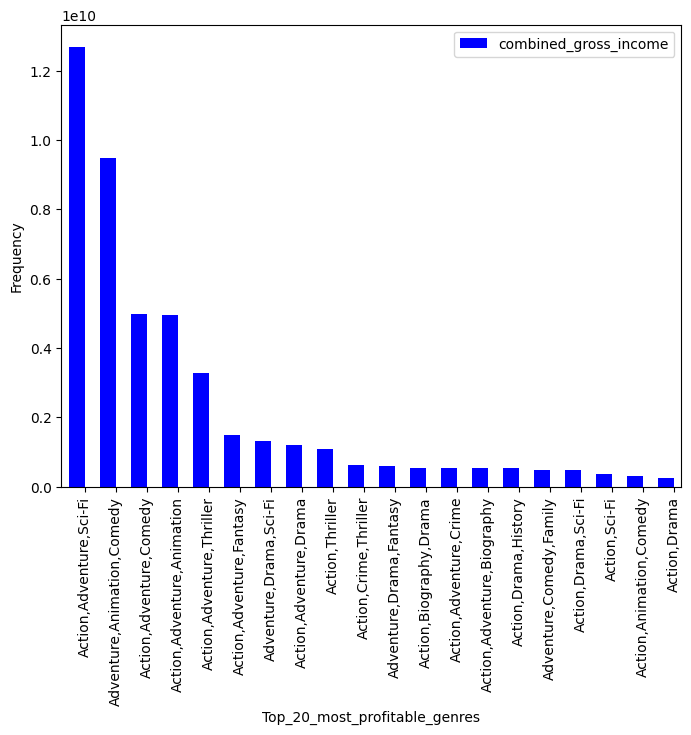

In [279]:
# plotting a bar graph to show the relationship between Genre and the Combined gross
fig = plt.figure(figsize=(8,6))
ax =fig.add_subplot(111)

width = 0.5
top_20_most_profitable_genres.plot(kind='bar', color='blue', ax=ax, width=width, position = 1)

ax.legend()
plt.xlabel('Top_20_most_profitable_genres')
plt.ylabel('Frequency')
plt.show()


From this bar graph we can see that Action adventure Sci -Fi is the most sold followed by Adventure animation comedy and the Top three genre is Action adventure animation

In [280]:
# lets find the highest rated genres
top_10_highest_rated_genres = combined_table3.groupby('genres')['averagerating'].sum()[:10]
top_10_highest_rated_genres = top_10_highest_rated_genres.sort_values(ascending=False)
top_10_highest_rated_genres

genres
Action,Adventure,Sci-Fi       115.2
Action,Adventure,Animation     60.4
Action,Adventure,Comedy        54.5
Action,Adventure,Thriller      30.4
Action,Adventure,Drama         15.1
Action,Adventure,Fantasy       15.0
Action,Adventure,Biography      8.0
Action,Adventure,Crime          7.5
Action,Animation,Comedy         7.3
Action,Biography,Drama          7.3
Name: averagerating, dtype: float64

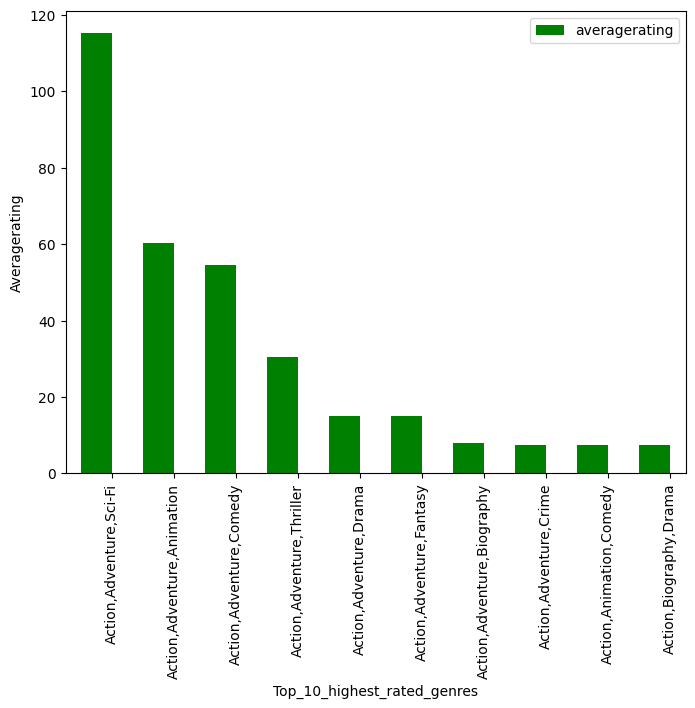

In [281]:
# plotting a bar graph to show the Relationship between genre vs the AverageRating
fig = plt.figure(figsize=(8,6))
ax =fig.add_subplot(111)

width = 0.5
top_10_highest_rated_genres.plot(kind='bar', color='green', ax=ax, width=width, position = 1)

ax.legend()
plt.xlabel('Top_10_highest_rated_genres')
plt.ylabel('Averagerating')
plt.show()

In [282]:
# plotting the bar graph using the seaborn method to show the relationship between genre and average ratings
genre_rating = combined_table3.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
genre_rating.head()

genres
Drama,Western             8.4
Action,Thriller           8.4
Adventure,Drama,Sci-Fi    8.3
Documentary               8.3
Action,Drama              8.3
Name: averagerating, dtype: float64

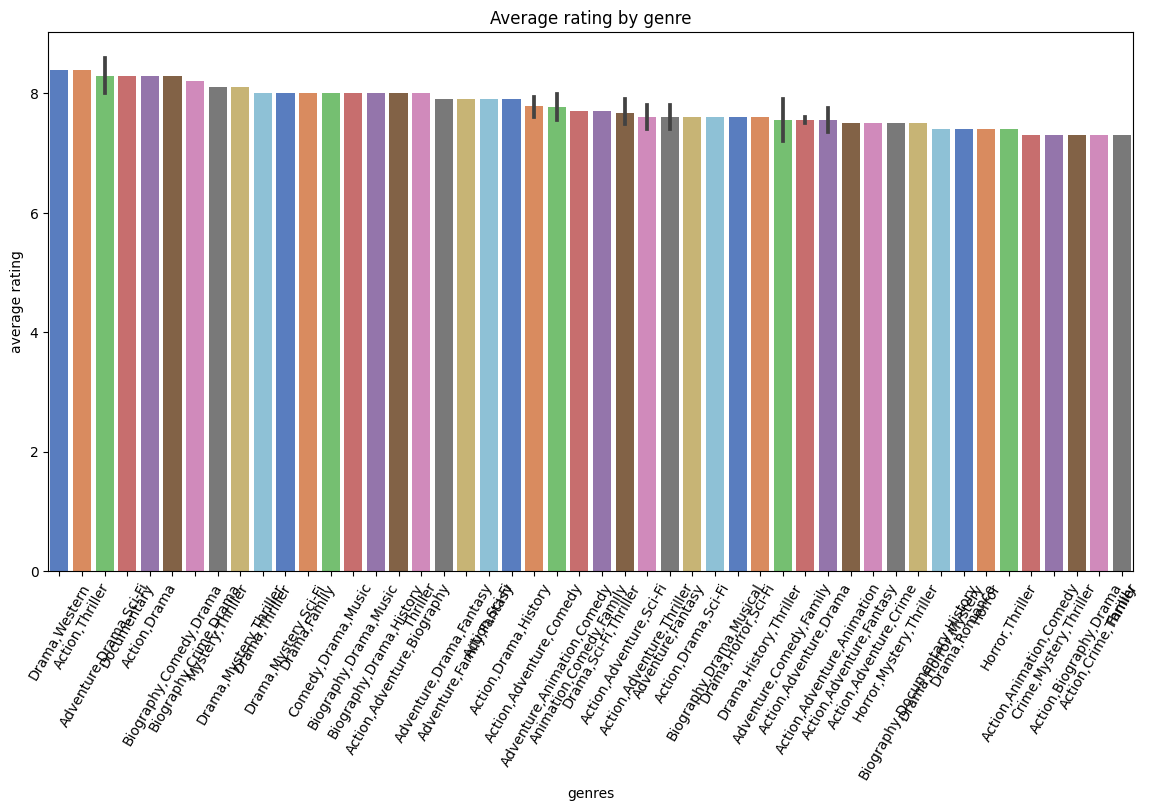

In [283]:
#bar graph showing the average rating by genre
fig, ax =plt.subplots(figsize=(14,7))
order_by = combined_table3.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.barplot(data=combined_table3, x='genres', y= 'averagerating', palette='muted', order=order_by, ax=ax)
ax.set_title('Average rating by genre')
ax.set_ylabel('average rating')
plt.xticks(rotation=60);

From the above table DramaWestern has the highest rating,
ActionThriller is second in rating, while AdventureDramaSci-Fi is the 3rd most rated tying with Documentary  and ActionDrama genres

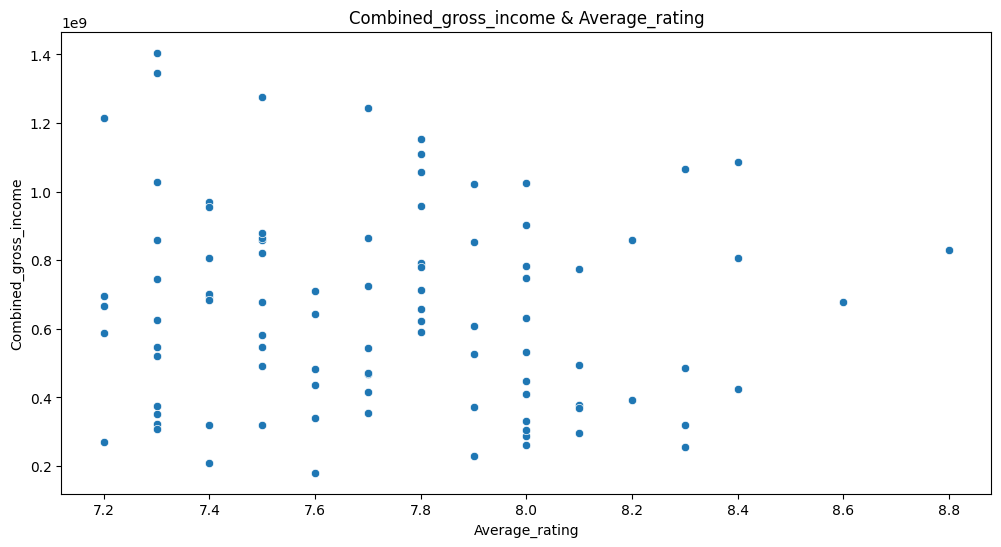

In [284]:
#Scatter plot to show relationship between Combined_gross_income and Average rating
fig, ax =plt.subplots(figsize=(12,6))
sns.scatterplot(x=combined_table3['averagerating'], y=combined_table3['combined_gross_income'], ax=ax)
ax.set_title('Combined_gross_income & Average_rating')
ax.set_ylabel('Combined_gross_income')
ax.set_xlabel('Average_rating');

There is no clear relationship between the Combined_gross_income and the average rating. This shows the rating of a Film doesnt necessarily affect the revevue of the film

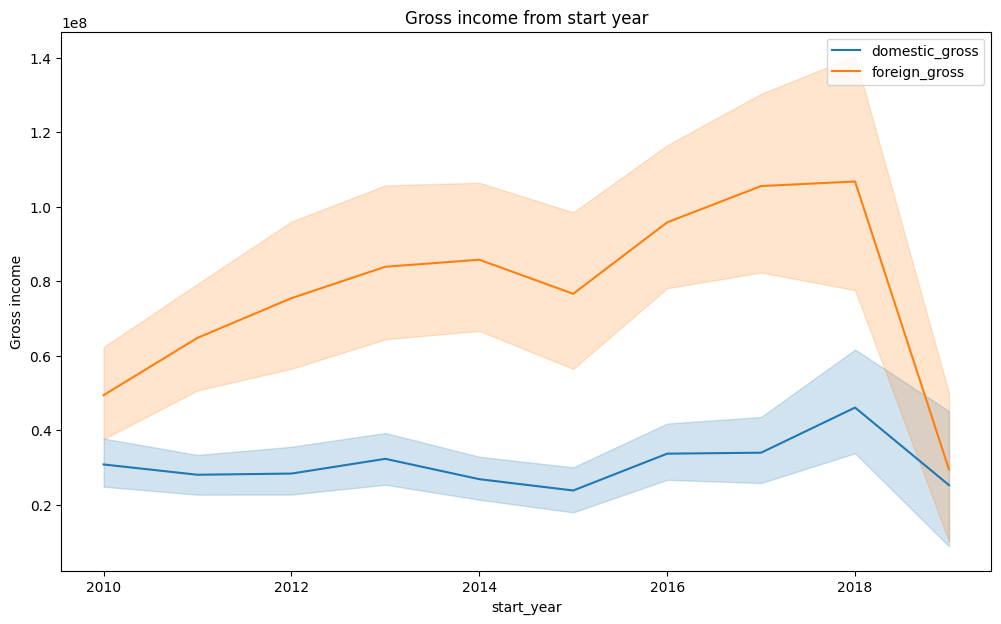

In [285]:
#lineplot showing the domestic gross and foreign gross income from the Year of release
fig, ax =plt.subplots(figsize=(12,7))
sns.lineplot(data=combined_table2, x='start_year', y='domestic_gross', ax=ax, label='domestic_gross')
sns.lineplot(data=combined_table2, x='start_year', y='foreign_gross', label='foreign_gross', ax=ax)
ax.set_title('Gross income from start year')
ax.set_ylabel('Gross income');


Over the years, it has been observed that the foreign gross income of movies often surpasses their domestic gross income upon release. In 2018, movies achieved their highest earnings in both foreign and domestic markets. However, there was a significant drop in gross incomes for films released in 2019, which can be attributed to the growing preference of many individuals to utilize streaming services instead of visiting theaters.

**Conclusions and recommendations**

The genres of most of the Films that have been produced are drama,romance, comedy,sci -fi and action.The least released are sport documentary,comedy documentary and history films.
Based on our analysis above the success of a film is determined mostly by the genre.The most profitable films are action adventure,action sci-fi, action comedy and action thriller.The average rating does not affect the sales of a film.From the above analysis we see documentary having a high average rating but it is has a low total gross income. Hence we ascertain that their is no clear relationship between the total gross income and the average rating.It is of importance to note that the foreign market has returned a high gross from the year of release compared to the domestic market.

**Recommendations:**

Microsoft should consider venturing on action adventure,action sci-fi, action comedy and action thriller films.
Microsoft should focus on exploring more the international markets which have had a higher gross over the years when compared to the domestic markets. T
